# TOV Equations

The equations of structure of an static compact object with spherical symmetry are given by (in units where $c=G=1$):

$$ P=P(\rho), $$
$$ \frac{dm}{dr}=4\pi \rho r^2 , $$
$$ \frac{dP}{dr}=-(\rho+P)\frac{m+4\pi r^3 P}{r(r-2m)} , $$

And if it's required


$$ \frac{d\nu}{dr}= \frac{m+4\pi r^3 P}{r(r-2m)} = -\frac{1}{\rho+P}\frac{dP}{dr}.$$

## Non-dimensionalization

$$ \rho=\rho_* \bar{\rho} \quad ; \quad P=P_* \bar{P} \quad ; \quad m=m_*\bar{m} \quad ; \quad r=r_*\bar{r}. $$

Replacing in the system of equations one obtains:
$$ \frac{d\bar{m}}{\bar{dr}}=\left( \frac{\rho_* r_*^3}{m_*} \right) 4\pi \bar{\rho} \bar{r}^2 , $$
$$ \frac{d\bar{P}}{d\bar{r}}=-\left( \frac{m_*}{r_* \rho_*} \right)\left(\frac{\rho_*}{P_*}\bar{\rho}+\bar{P}\right)\frac{\bar{m}+\left( \frac{r_*^3 P_*}{m_*} \right)4\pi \bar{r}^3 \bar{P}}{\bar{r}\left(\bar{r}-\frac{m_*}{r_*}2\bar{m}\right)}, $$
$$ \frac{d\nu}{d\bar{r}}=-\frac{1}{\left(\bar{P}+\frac{\rho_*}{P_*}\bar{\rho}\right)}\frac{d\bar{P}}{d\bar{r}}. $$

In order to keep the form of system of equations the same, it is required that:
$$\frac{\rho_* r_*^3}{m_*}=1,\quad \frac{m_*}{r_* \rho_*}=1, \quad \frac{\rho_*}{P_*}=1, \quad \frac{r_*^3 P_*}{m_*}=1,\quad \frac{m_*}{r_*}=1. $$

or
$$P_*=\rho_*,\quad m_*=r_*,\quad r_*=\frac{1}{\sqrt{\rho_*}}. $$

Using the neutron mass $m_n$ as the only parameter one can write $\rho_*= \frac{m_{n}^{4}c^{3}}{8 \pi^2 \hbar^3} $ and putting back the factors of $G$ and $c$ we have everything in terms of $m_{n}$:
$$ \rho_*=\frac{m_{n}^{4}c^{3}}{8 \pi^2 \hbar^3},\quad P_*= \rho_* c^2 ,\quad  r_*=\frac{c}{\sqrt{\rho_* G}}\quad, \quad m_*= \frac{r_* c^2}{G}.$$

Finally, the nondimensional TOV equations will be 
$$ \bar{P}=\bar{P}(\bar{\rho}), $$
$$ \frac{d\bar{m}}{\bar{dr}}=4\pi \bar{\rho} \bar{r}^2 , $$
$$ \frac{d\bar{P}}{d\bar{r}}=-(\bar{\rho}+\bar{P})\frac{\bar{m}+4\pi \bar{r}^3 \bar{P}}{\bar{r}(\bar{r}-2\bar{m})}, $$
$$ \frac{d\nu}{d\bar{r}}=-\frac{1}{\bar{\rho}+\bar{P}}\frac{d\bar{P}}{d\bar{r}}. $$

## Avoiding singularities

The pressure gradient
$$ \frac{d\bar{P}}{d\bar{r}}=-(\bar{\rho}+\bar{P})\frac{\bar{m}+4\pi \bar{r}^3 \bar{P}}{\bar{r}(\bar{r}-2\bar{m})}, $$
is singular at $\bar{r}=0$. 

One can overcome this difficulty by expanding $\bar{\rho}$ in powers of $\bar{r}$ in the mass gradient equation (as it is done in newtonian stellar structure cf. Kippenhahn's book Stellar Structure
and Evolution, Chap. 11):
$$ \frac{d\bar{m}}{\bar{dr}}=4\pi \bar{r}^2 \left(  \bar{\rho} _ { c } + \left. \frac { \partial \bar{\rho }} { \partial \bar{r} } \right| _ { \bar{r} = 0 } \bar{r} + \ldots \right),$$
keeping only the first term and integrating to some small distance from the center
$$ \frac{d\bar{m}}{\bar{dr}}= 4\pi \bar{r}^2  \bar{\rho} _ { c }\\
\int _ { 0 } ^ { \bar{m} } d \bar{m} = \int _ { 0 } ^ { \bar{r} } 4 \pi \bar{r} ^ { 2 } \bar{\rho}_c d \bar{r} ^ { \prime } \\
\bar{m}  =  \frac { 4 } { 3 } \pi \bar{r} ^ { 3 } \bar{\rho} _ { c }.$$

Replacing this in the pressure gradient one gets

$$ \frac{d\bar{P}}{d\bar{r}} = -4\pi (\bar{P}+\bar{\rho}_c)\frac{\left(\frac{\bar{\rho}_c}{3}+\bar{P}\right)}{1-\frac{8}{3}\pi\bar{r}^2\bar{\rho}_c} \bar{r},$$
valid as long as $ \frac{\bar{\rho}}{\bar{\rho}_{c}} \sim 1$.

# Solving the system

Loading libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate
import math

Defining the zero (machine epsilon) 

In [2]:
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


Loading some constants (in cgs units) from a separeted file and defining the variables that carry the dimensions

In [3]:
import Physical_Const as phys
h=phys.h 
c=phys.c
G=phys.G
Msun=phys.Msun
mn=phys.mn # Neutron mass


rhodim=mn**4.0*c**3.0/(8.0*np.pi**2*(h/(2.0*np.pi))**3.0) #Dimensions of energy density
rdim=c/np.sqrt(rhodim*G) # Dimensions of radius
mdim=rdim*c**2.0/G # Dimensions of mass
Pdim=rhodim*c**2 # Dimensions of pressure

In [4]:
rhodim

2280831545249651.0

## EOS

We want our equation of state to be a table of numbers $(\rho_{i},P_{i})$, this equation of state will depend on the theoretical model used to model the interior of the neutron star.

Loading some of the equations of state contained in the EOS folder (taken from http://xtreme.as.arizona.edu/NeutronStars/, a website maintained by an astrophysics group in Arizona) and interpolating $\log{P}(\log{\rho})$ and $\log{\rho}(\log{P})$ linearly (as it is usually done, cf. Baym, Pethick, Sutherland 1971)

In [5]:
# loadtxt from numpy aids the process of reading and saving into numpy arrays
#rhoNL3,PNL3=np.loadtxt('EOS/EOSFull_NL3_BPS02.dat',usecols=(2,1),unpack=True) #Only EOS not included in the website
#def P_NL3(rho):
 #   logP=interpolate.interp1d(np.log10(rhoNL3/rhodim),np.log10(PNL3/Pdim))
 #   return 10.0**logP(np.log10(rho))
#def rho_NL3(P):
 #   logrho=interpolate.interp1d(np.log10(PNL3/Pdim),np.log10(rhoNL3/rhodim))
 #   return 10.0**logrho(np.log10(P))

rhoSLy,PSLy=np.loadtxt('EOS/sly.dat',usecols=(2,1),unpack=True)
def P_SLy(rho):
    logP=interpolate.interp1d(np.log10(rhoSLy/rhodim),np.log10((PSLy*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_SLy(P):
    logrho=interpolate.interp1d(np.log10((PSLy*c**2)/Pdim),np.log10(rhoSLy/rhodim))
    return 10.0**logrho(np.log10(P))

rhoBSK19,PBSK19=np.loadtxt('EOS/bsk19.dat',usecols=(2,1),unpack=True) #This family of EOS (BSK##) has the column order inverted
def P_BSK19(rho):
    logP=interpolate.interp1d(np.log10(rhoBSK19/rhodim),np.log10((PBSK19*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_BSK19(P):
    logrho=interpolate.interp1d(np.log10((PBSK19*c**2)/Pdim),np.log10(rhoBSK19/rhodim))
    return 10.0**logrho(np.log10(P))

rhoBSK20,PBSK20=np.loadtxt('EOS/bsk20.dat',usecols=(2,1),unpack=True)
def P_BSK20(rho):
    logP=interpolate.interp1d(np.log10(rhoBSK20/rhodim),np.log10((PBSK20*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_BSK20(P):
    logrho=interpolate.interp1d(np.log10((PBSK20*c**2)/Pdim),np.log10(rhoBSK20/rhodim))
    return 10.0**logrho(np.log10(P))

rhoALF1,PALF1=np.loadtxt('EOS/alf1.dat',usecols=(2,1),unpack=True)
def P_ALF1(rho):
    logP=interpolate.interp1d(np.log10(rhoALF1/rhodim),np.log10((PALF1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_ALF1(P):
    logrho=interpolate.interp1d(np.log10((PALF1*c**2)/Pdim),np.log10((rhoALF1/rhodim)))
    return 10.0**logrho(np.log10(P))

rhoH1,PH1=np.loadtxt('EOS/H1.dat',usecols=(2,1),unpack=True)
def P_H1(rho):
    logP=interpolate.interp1d(np.log10(rhoH1/rhodim),np.log10((PH1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_H1(P):
    logrho=interpolate.interp1d(np.log10((PH1*c**2)/Pdim),np.log10(rhoH1/rhodim))
    return 10.0**logrho(np.log10(P))


rhoH4,PH4=np.loadtxt('EOS/H4.dat',usecols=(2,1),unpack=True)
def P_H4(rho):
    logP=interpolate.interp1d(np.log10(rhoH4/rhodim),np.log10((PH4*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_H4(P):
    logrho=interpolate.interp1d(np.log10((PH4*c**2)/Pdim),np.log10(rhoH4/rhodim))
    return 10.0**logrho(np.log10(P))                            


rhoGS1,PGS1=np.loadtxt('EOS/gs1.dat',usecols=(2,1),unpack=True)
def P_GS1(rho):
    logP=interpolate.interp1d(np.log10(rhoGS1/rhodim),np.log10((PGS1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_GS1(P):
    logrho=interpolate.interp1d(np.log10((PGS1*c**2)/Pdim),np.log10(rhoGS1/rhodim))
    return 10.0**logrho(np.log10(P))

rhoGS2,PGS2=np.loadtxt('EOS/gs2.dat',usecols=(2,1),unpack=True)
def P_GS2(rho):
    logP=interpolate.interp1d(np.log10(rhoGS2/rhodim),np.log10((PGS2*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_GS2(P):
    logrho=interpolate.interp1d(np.log10((PGS2*c**2)/Pdim),np.log10(rhoGS2/rhodim))
    return 10.0**logrho(np.log10(P))


#-------------------------(Don't know how the data is organized yet)
rhoSQM1,PSQM1=np.loadtxt('EOS/sqm1.dat',usecols=(2,1),unpack=True)
def P_SQM1(rho):
    logP=interpolate.interp1d(np.log10(rhoSQM1/rhodim),np.log10((PSQM1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_SQM1(P):
    logrho=interpolate.interp1d(np.log10((PSQM1*c**2)/Pdim),np.log10(rhoSQM1/rhodim))
    return 10.0**logrho(np.log10(P))

rhoSQM2,PSQM2=np.loadtxt('EOS/sqm2.dat',usecols=(2,1),unpack=True)
def P_SQM2(rho):
    logP=interpolate.interp1d(np.log10(rhoSQM2/rhodim),np.log10((PSQM2*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_SQM2(P):
    logrho=interpolate.interp1d(np.log10((PSQM2*c**2)/Pdim),np.log10(rhoSQM2/rhodim))
    return 10.0**logrho(np.log10(P))

rhoSQM3,PSQM3=np.loadtxt('EOS/sqm3.dat',usecols=(2,1),unpack=True)
def P_SQM3(rho):
    logP=interpolate.interp1d(np.log10(rhoSQM3/rhodim),np.log10((PSQM3*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_SQM3(P):
    logrho=interpolate.interp1d(np.log10((PSQM3*c**2)/Pdim),np.log10(rhoSQM3/rhodim))
    return 10.0**logrho(np.log10(P))

OSError: EOS/gs1.dat not found.

Plotting them with logarithmic scale on both axis

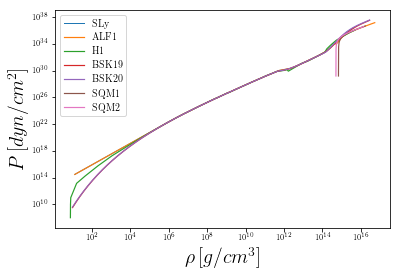

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

#plt.loglog(rhoNL3,P_NL3(rhoNL3/rhodim)*Pdim,'k-', linewidth=1,label="NL3") # Interpolation
#plt.loglog(rhoNL3,PNL3,'o', markersize=0.8) # Data

plt.loglog(rhoSLy,P_SLy(rhoSLy/rhodim)*Pdim,'-', linewidth=1,label="SLy") 
#plt.loglog(rhoSLy,PSLy*c**2,'o', markersize=0.5) 

plt.loglog(rhoALF1,P_ALF1(rhoALF1/rhodim)*Pdim,'-', linewidth=1.2,label="ALF1") 
#plt.loglog(rhoALF1,PALF1*c**2,'o', markersize=.5) 

plt.loglog(rhoH1,P_H1(rhoH1/rhodim)*Pdim,'-', linewidth=1.2,label="H1") 
#plt.loglog(rhoH1,PH1*c**2,'o', markersize=.5) 


plt.loglog(rhoBSK19,P_BSK19(rhoBSK19/rhodim)*Pdim,'-', linewidth=1.2,label="BSK19") 
#plt.loglog(rhoBSK19,PBSK19*c**2,'o', markersize=.5) 

plt.loglog(rhoBSK20,P_BSK20(rhoBSK20/rhodim)*Pdim,'-', linewidth=1.2,label="BSK20") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', markersize=.5) 

#-------------Strange Quark Matter 
    
plt.loglog(rhoSQM1,P_SQM1(rhoSQM1/rhodim)*Pdim,'-', linewidth=1.2,label="SQM1") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', markersize=.5) 
    
plt.loglog(rhoSQM2,P_SQM2(rhoSQM2/rhodim)*Pdim,'-', linewidth=1.2,label="SQM2") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', markersize=.5)  
    
plt.xlabel(r'$\rho\,[g/cm^3]$')
plt.ylabel(r'$P\,[dyn/cm^{2}]$')
plt.legend()
#plt.savefig('figures/EOS.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Seting up the ODE solver

In standard notation the system of ODEs can be written
$$ \frac{dy^{i}}{dr} = f^{i}(r,y^i). $$
Where $y=(m,P,\nu)$ and $f$ is the right hand side of the system.

Using the RK4 method, an integration step $dr$ will be done by

In [6]:
def RK4(f, r, y, dr):
    """Propagates the solver one step further. Takes as inputs the RHS of the system f, the current location r,
    the current value of the variables y, and the stepsize. Returns the value of the variables in location r+dr."""
    k1,l1,n1 = f(r,y)
    
    k2,l2,n2 = f(r+0.5*dr,[y[0]+0.5*dr*k1,y[1]+0.5*dr*l1,y[2]+0.5*dr*n1])   
    
    k3,l3,n3 = f(r+0.5*dr,[y[0]+0.5*dr*k2,y[1]+0.5*dr*l2,y[2]+0.5*dr*n2])
    
    k4,l4,n4 = f(r+dr,[y[0]+dr*k3,y[1]+dr*l3,y[2]+dr*n3])
    
    k=(dr/6)*(k1+2.0*k2+2.0*k3+k4)
    l=(dr/6)*(l1+2.0*l2+2.0*l3+l4)
    n=(dr/6)*(n1+2.0*n2+2.0*n3+n4)
    
    return [y[0]+k,y[1]+l,y[2]+n]

With the value of $dr$ (taken from Baym, Pethick, Sutherland 1971)

$$  \Delta{r} = \delta \left( \frac { 1 } { m } \frac { \mathop{dm} } { \mathop{dr}  } - \frac { 1 } { P } \frac { \mathop{dP}  } { \mathop{dr} } \right) ^ { - 1 }, $$
where $\delta$ will control the number of steps per pressure-mass decade. Note that the initial step has to be taken arbitrarily.

In [7]:
delta=0.16
def stepsize(y,dy):
    """Adaptive stepsize. It takes the current value of the variables and it's gradients. The parameter delta is defined externally."""
    return delta*((1/y[0])*dy[0]-(1/y[1])*dy[1])**(-1)

To solve the TOV equations we need two initial conditions:

$$ \bar{P}{(0)}=P_{c}{(\bar{\rho_{c}})} \quad ; \quad \bar{m}{(0)}=0,$$

depending on the choice of $\rho_{c}$.

The routine will take a list of initial values $y0=(m_0,P_0,\nu_0)$, the initial radius $r_0$ and stepsize $dr_0$, and the EOS as input. And it will return an array with $m(r)$, $P(r)$, $\rho(r)$, $\nu(r)$ and $r$ in nondimensional units.

In [8]:
def static(y0,r0,dr0,rhoEoS,cutoff=0.0):
    """Builds a neutron star model from the initial values y0 and an interpolated EOS. The solver will start
    in r0 with an arbitrary stepsize dr0 and will stop when the
    pressure becomes negative. Returns the mass, pressure, density and nu profiles as functions of r. The parameter cutoff
    can be provided to stop the integration at the minimum energy density available in the EOS."""
    
    def TOV(r,y):
        mns, pns, nuns= y
        dmdr=4.0*np.pi*r**2.0*rhoEoS(pns)
        if (1.0-(rhoEoS(pns)/rhoEoS(y0[1])))<(2*epsilon):
            dpdr=-4*np.pi*((pns+rhoEoS(y0[1]))*(rhoEoS(y0[1])/3+pns)/(1-(8*np.pi/3)*r**2*rhoEoS(y0[1])))*r
            #print('h')
        else:
            dpdr=-((4.0*np.pi*r**3.0*pns+mns)*(pns+rhoEoS(pns)))/(r*(r-2.0*mns))
        dnudr=-dpdr/(pns+rhoEoS(pns))
        #print('P',pns*Pdim,'rho',rhoEoS(pns)*rhodim)
        #print('r',r)
        return [dmdr,dpdr,dnudr]
    
    ms=[]; ps=[]; rhos=[]; nus=[]; rs=[]  # creating lists to save the solution  
    ms.append(y0[0]); ps.append(y0[1]); rhos.append(rhoEoS(y0[1])); nus.append(y0[2]); rs.append(r0) 
    y=RK4(TOV,r0,y0,dr0) # first step taken arbitrary (dr0)  
    dr=dr0
    r=r0+dr 
    ms.append(y[0]); ps.append(y[1]); rhos.append(rhoEoS(y[1])); nus.append(y[2]); rs.append(r) 
    while y[1] > 1e-10 and rhoEoS(y[1])*rhodim > cutoff and dr>10*epsilon:
        #print('h2')
        #print('P',y[1],'m',y[0],'r',r,'dr',dr)
        dr=stepsize(y,TOV(r,y))
        y=RK4(TOV,r,y,dr)
        r=r+dr
        ms.append(y[0]); ps.append(y[1]); rhos.append(rhoEoS(y[1])); nus.append(y[2]); rs.append(r) 
    return np.array([ms,ps,rhos,nus,rs])

# Troubleshooting with exact solutions

In order to check if the routine gives reliable results, these can be compared with exact solutions to the TOV equations that exist for very simple EOSs or, instead of a EOS, a variable given as a function of $r$.

## Schwarzschild's constant density interior solution

The easiest exact solution to the TOV equations is found with the assumption 
$$\rho=const, $$
which gives 
$$ m = \frac{4}{3}\pi r^3$$

$$ P =\rho \frac{\left(1-2 M r^{2} / R^{3}\right)^{1 / 2}-(1-2 M / R)^{1 / 2}}{3(1-2 M / R)^{1 / 2}-\left(1-2 M r^{2} / R^{3}\right)^{1 / 2}}, $$
$$ e^{\nu}=\frac{3}{2}\left(1-\frac{2 M}{R}\right)^{1 / 2}-\frac{1}{2}\left(1-\frac{2 M r^{2}}{R^{3}}\right)^{1 / 2}, $$
where 
$$M = 4 \pi \rho R^{3} / 3 \quad \text{and}\quad R^{2}=\frac{3}{8 \pi \rho}\left[1-\left(\frac{\rho+P_{c}}{\rho+3 P_{c}}\right)^{2}\right], $$
with $P_c$ as an arbitrary constant.

### Solving numerically

In [9]:
constantrho=(10.0**15)/(rhodim)
P_c=(10.0**30)/(Pdim)
R=math.sqrt(3*(1-((constantrho+P_c)/(constantrho+3*P_c))**2)/(8*np.pi*constantrho))
M=(4*np.pi*constantrho*R**3)/3

#Exact solution
def Pexact1(r):
    return constantrho*(math.sqrt(1-(2*M*r**2)/R**3)-math.sqrt(1-2*M/R))/(3*math.sqrt(1-(2*M*r**2)/R**3)-math.sqrt(1-2*M/R))


#EOS used by the static routine
def PEOSexact1(rho):
    return constantrho

mnum1,pnum1,rho1,nunum1,rnum1 = static([0.0,P_c,0.0],0.0,1e-8,PEOSexact1)

Pexactt1=[]
error1=[]

for i in range(len(rnum1)):
    r=rnum1[i]
    Pexactt1.append(Pexact1(r))
    error1.append(abs(Pexact1(r)-pnum1[i]))

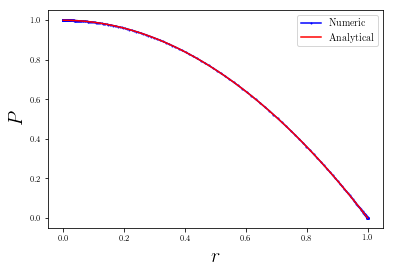

In [10]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()

plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
plt.plot(rnum1/rnum1[-1],pnum1/pnum1[0],color='blue',marker='o',markersize=1,label='Numeric')
plt.plot(rnum1/rnum1[-1],Pexactt1/pnum1[0],color='red',label='Analytical')
plt.legend()

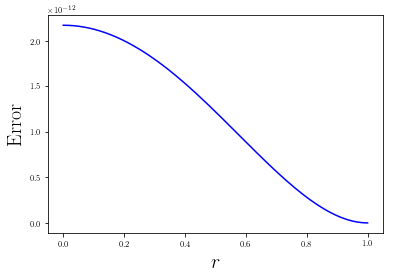

In [11]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()

plt.xlabel(r'$r$')
plt.ylabel('Error')
plt.plot(rnum1/rnum1[-1],error1,color='blue')

Se encuentran errores del orden de $10^{-12}$.

## Tolman IV solution

Assuming the relation 
$$ \frac{e^{2\nu} \nu^\prime}{2r}= \text{const}. $$
The solution takes the form (taken from "Modeeling usual and unusual anisotropic spheres" by S. Viaggiu)

$$ R^2 \rho=\frac{3\frac{M}{R}\left(2 - 9 \frac{M}{R}-7 \frac{M^2}{R^2} \frac{r^{2}}{R^2}+ 2 \frac{M^{2}}{R^2} \frac{r^{4}}{R^4} +3 \frac{M}{R} \frac{r^{2}}{R^2} +9 \frac{M^{2}}{R^2}\right)}{8 \pi \left(1-3\frac{M}{R}+2 \frac{M}{R} \frac{r^{2}}{R^2} \right)^{2}}, $$

$$ R^2 P=  \frac{3\frac{M^{2}}{R^2}\left(1-\frac{r^{2}}{R^2}\right)}{8 \pi \left(1-3 \frac{M}{R} + 2 \frac{M}{R} \frac{r^{2}}{R^2} \right)}, $$

where M and R are the mass and radius at the boundary of the start. It is known that for $R > 3M$ the functions are regular. 

### Solving numerically

In [12]:
Beta=0.15

def rhoexact2(r):
    return (3/(8*np.pi))*Beta*(2-9*Beta-7*(Beta**2)*((r)**2)+2*(Beta**2)*((r)**4)+3*Beta*((r)**2)+9*(Beta**2))/(1-3*Beta+2*Beta*(r)**2)**2

#def rhoexact3(r):
#    return Beta*(6-15*Beta+Beta*((r)**2)+6*(Beta**2)*((r)**2))/(1-3*Beta+2*Beta*(r)**2)**2

def Pexact2(r):
    return (3/(8*np.pi))*(Beta**2)*(1-(r)**2)/(1-3*Beta+2*Beta*((r)**2))

#Making a sample of rho and P for a range of r

n=1000 #number of samples
rrange=1.0
deltar=rrange/(n)
r0temp=0.0

rhotemp=np.zeros(n+1)
Ptemp=np.zeros(n+1)
rtemp=np.zeros(n+1)

for i in range(n+1):
    rhotemp[i]=rhoexact2(r0temp)
    Ptemp[i]=Pexact2(r0temp)
    rtemp[i]=r0temp
    r0temp=r0temp+deltar
    
#This sample is equivalent to a equation of state


def PEOSexact2(rho):
    P=interpolate.interp1d(rhotemp,Ptemp)
    return P(rho)
def rhoEOSexact2(P):
    rho=interpolate.interp1d(Ptemp,rhotemp)
    return rho(P)

mnum2,pnum2,rhonum2,nunum2,rnum2 = static([0.0,PEOSexact2(rhotemp[0]),0.0],0.0,1e-8,rhoEOSexact2)

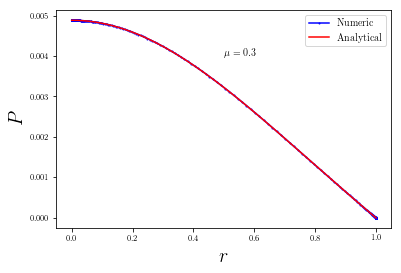

In [16]:
plt.plot(rnum2,pnum2,color='blue',marker='o',markersize=1,label='Numeric')
plt.plot(rtemp,Ptemp,color='red',label='Analytical')
plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
plt.legend()
plt.text(0.5,0.004,r'$\mu=0.3$')
#plt.savefig('figures/PTolmanIVmu30.png', format='png', dpi=1000,bbox_inches="tight")

### $\mu=0.5$

In [8]:
rT4,PT4mu50=np.loadtxt('exactEOS/PaT4mu50.dat',usecols=(0,1),unpack=True)
rhoT4mu50=np.loadtxt('exactEOS/rhoT4mu50.dat',usecols=(1),unpack=True)

def PEOSexact7(rho):
    P=interpolate.interp1d(rhoT4mu50,PT4mu50)
    return P(rho)
def rhoEOSexact7(P):
    rho=interpolate.interp1d(PT4mu50,rhoT4mu50)
    return rho(P)

mnum7,pnum7,rhonum7,nunum7,rnum7 = static([0.0,PEOSexact7(rhoT4mu50[0]),0.0],0.0,1e-8,rhoEOSexact7)

In [87]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend',fontsize= 15,markerscale=1.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

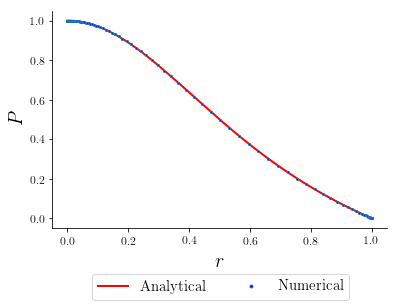

In [88]:
fig=plt.figure()
plt.plot(rT4,PT4mu50/PT4mu50[0],'r',linewidth='2.0',label='Analytical')
plt.plot(rnum7/rnum7[-1],pnum7/pnum7[0],linestyle='None',marker='o',mfc='blue',markersize='2.0',label='Numerical')
plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
l = plt.legend(bbox_to_anchor=(0.83,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=2)
#plt.text(0.55,0.03,r'$\mu=0.5$')
plt.savefig('figures/PTolmanIVmu50.pdf', format='pdf', dpi=1000,bbox_inches="tight")

In [65]:
k=5 #spline order kmax=5
s=0 #smooth factor

rhos7=interpolate.UnivariateSpline(rnum7/rnum7[-1], rhonum7/rhonum7[0], k=k, s=s)
ps7=interpolate.UnivariateSpline(rnum7/rnum7[-1], pnum7/pnum7[0], k=k, s=s)

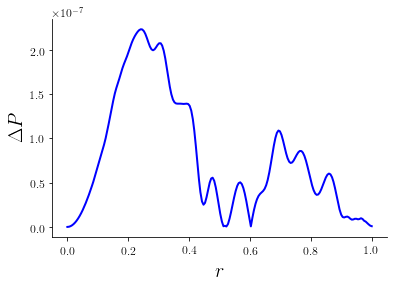

In [90]:
fig=plt.figure()
plt.xlabel(r'$r$')
plt.ylabel(r'$\Delta{P}$')
plt.plot(rT4,abs(ps7(rT4)-PT4mu50/PT4mu50[0]),color='blue',linewidth='2.0')
plt.savefig('figures/PTolmanIVmu50Error.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tolman VII solution

### $\mu=0.4$

In [19]:
rT7,PT7mu40=np.loadtxt('exactEOS/PaT7mu40.dat',usecols=(0,1),unpack=True)
rhoT7mu40=np.loadtxt('exactEOS/rhoT7mu40.dat',usecols=(1),unpack=True)

def PEOSexact3(rho):
    P=interpolate.interp1d(rhoT7mu40,PT7mu40)
    return P(rho)
def rhoEOSexact3(P):
    rho=interpolate.interp1d(PT7mu40,rhoT7mu40)
    return rho(P)

mnum3,pnum3,rhonum3,nunum3,rnum3 = static([0.0,PEOSexact3(rhoT7mu40[0]),0.0],0.0,1e-8,rhoEOSexact3)

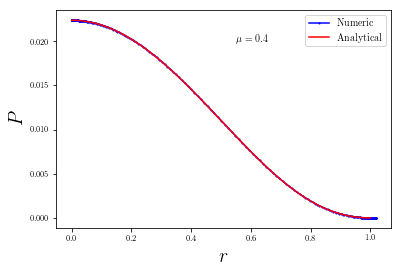

In [20]:
plt.plot(rnum3,pnum3,color='blue',marker='o',markersize=1,label='Numeric')
plt.plot(rT7,PT7mu40,color='red',label='Analytical')
plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
plt.legend()
plt.text(0.55,0.02,r'$\mu=0.4$')
plt.savefig('figures/PTolmanVIImu40.png', format='png', dpi=1000,bbox_inches="tight")

### $\mu=0.45$

In [21]:
PT7mu45=np.loadtxt('exactEOS/PaT7mu45.dat',usecols=(1),unpack=True)
rhoT7mu45=np.loadtxt('exactEOS/rhoT7mu45.dat',usecols=(1),unpack=True)

def PEOSexact4(rho):
    P=interpolate.interp1d(rhoT7mu45,PT7mu45)
    return P(rho)
def rhoEOSexact4(P):
    rho=interpolate.interp1d(PT7mu45,rhoT7mu45)
    return rho(P)

mnum4,pnum4,rhonum4,nunum4,rnum4 = static([0.0,PEOSexact4(rhoT7mu45[0]),0.0],0.0,1e-8,rhoEOSexact4)

Text(0.55, 0.025, '$\\mu=0.45$')

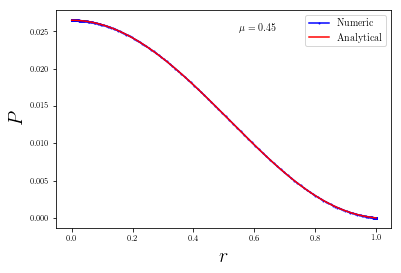

In [22]:
plt.plot(rnum4,pnum4,color='blue',marker='o',markersize=1,label='Numeric')
plt.plot(rT7,PT7mu45,color='red',label='Analytical')
plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
plt.legend()
plt.text(0.55,0.025,r'$\mu=0.45$')
#plt.savefig('figures/PTolmanVIImu45.png', format='png', dpi=1000,bbox_inches="tight")

In [23]:
k=5 #spline order kmax=5
s=1e-11 #smooth factor

rhos4=interpolate.UnivariateSpline(rnum4, rhonum4, k=k, s=s)
drho4=interpolate.UnivariateSpline(rnum4, rhonum4, k=k, s=s).derivative(n=1)
ddrho4=interpolate.UnivariateSpline(rnum4, rhonum4, k=k, s=s).derivative(n=2)

ps4=interpolate.UnivariateSpline(rnum4, pnum4, k=k, s=s)
dp4=interpolate.UnivariateSpline(rnum4, pnum4, k=k, s=s).derivative(n=1)
ddp4=interpolate.UnivariateSpline(rnum4, pnum4, k=k, s=s).derivative(n=2)

/home/dave/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:226: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


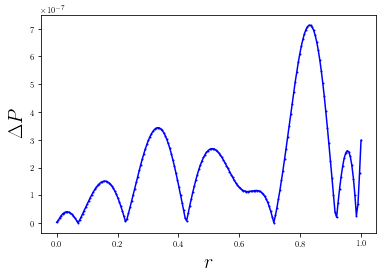

In [25]:
fig=plt.figure()

plt.xlabel(r'$r$')
plt.ylabel(r'$\Delta{P}$')
plt.plot(rT7,abs(ps4(rT7)-PT7mu45),color='blue',marker='o',markersize=1,label='Numeric')

The propagation of error from calculating the derivative numerically can also be obtained

In [26]:
rhoppT7mu45=np.loadtxt('exact_derivatives/rhoppaT7mu45.dat',usecols=(1),unpack=True)

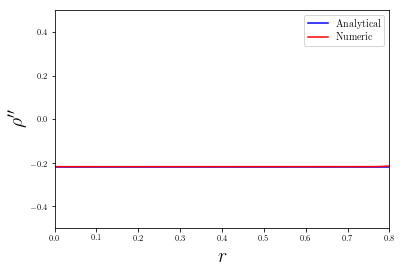

In [27]:
plt.plot(rT7,rhoppT7mu45,color='blue',label='Analytical')
plt.plot(rT7,ddrho4(rT7),color='red',label='Numeric')
plt.xlabel(r'$r$')
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlim(0,0.8)
plt.ylim(-0.5,0.5)
plt.legend()

#plt.savefig('figures/rhoppTolmanVIImu45.png', format='png', dpi=1000,bbox_inches="tight")

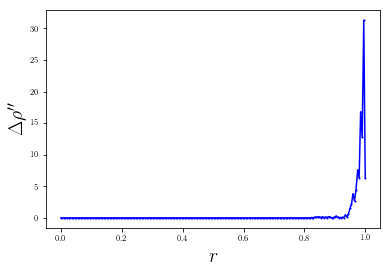

In [28]:
fig=plt.figure()

plt.xlabel(r'$r$')
plt.ylabel(r'$\Delta{\rho^{\prime\prime}}$')
plt.plot(rT7,abs(ddrho4(rT7)-rhoppT7mu45),color='blue',marker='o',markersize=1,label='Numeric')

The error is significant only close to the edge of the star.

### $\mu=0.5$

In [33]:
PT7mu50=np.loadtxt('exactEOS/PaT7mu50.dat',usecols=(1),unpack=True)
rhoT7mu50=np.loadtxt('exactEOS/rhoT7mu50.dat',usecols=(1),unpack=True)

def PEOSexact5(rho):
    P=interpolate.interp1d(rhoT7mu50,PT7mu50)
    return P(rho)
def rhoEOSexact5(P):
    rho=interpolate.interp1d(PT7mu50,rhoT7mu50)
    return rho(P)

mnum5,pnum5,rhonum5,nunum5,rnum5 = static([0.0,PEOSexact5(rhoT7mu50[0]),0.0],0.0,1e-8,rhoEOSexact5)

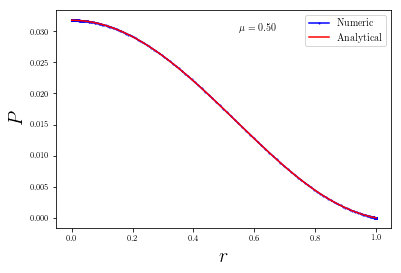

In [34]:
plt.plot(rnum5,pnum5,color='blue',marker='o',markersize=1,label='Numeric')
plt.plot(rT7,PT7mu50,color='red',label='Analytical')
plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
plt.legend()
plt.text(0.55,0.03,r'$\mu=0.50$')
plt.savefig('figures/PTolmanVIImu50.png', format='png', dpi=1000,bbox_inches="tight")

In [35]:
PT7mu52=np.loadtxt('exactEOS/PaT7mu52.dat',usecols=(1),unpack=True)
rhoT7mu52=np.loadtxt('exactEOS/rhoT7mu52.dat',usecols=(1),unpack=True)

def PEOSexact6(rho):
    P=interpolate.interp1d(rhoT7mu52,PT7mu52)
    return P(rho)
def rhoEOSexact6(P):
    rho=interpolate.interp1d(PT7mu52,rhoT7mu52)
    return rho(P)

mnum6,pnum6,rhonum6,nunum6,rnum6 = static([0.0,PEOSexact6(rhoT7mu52[0]),0.0],0.0,1e-8,rhoEOSexact6)

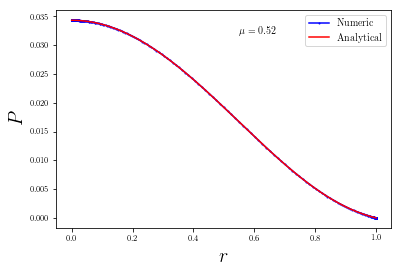

In [36]:
plt.plot(rnum6,pnum6,color='blue',marker='o',markersize=1,label='Numeric')
plt.plot(rT7,PT7mu52,color='red',label='Analytical')
plt.xlabel(r'$r$')
plt.ylabel(r'$P$')
plt.legend()
plt.text(0.55,0.032,r'$\mu=0.52$')
plt.savefig('figures/PTolmanVIImu52.png', format='png', dpi=1000,bbox_inches="tight")

# Constructing real models: an example

Choosing initial values and parameters

In [36]:
r0=0
dr0=1e-6
rho01 = 10.0**14.5
rho02 = 10.0**14.1
rho03 = 10.0**15
m0=0
nu0=0

and picking one of the EOS

In [37]:
m1,p1,rho1,nu1,r1 = static([m0,P_H4(rho01/rhodim),nu0],r0,dr0,rho_H4,cutoff=(1+0.05)*np.amin(rhoH4))

In [38]:
k1=5 #spline order kmax=5
s1=4e-7 #smooth factor
k2=5
s2=1e-12

rhos1=interpolate.UnivariateSpline(r1, rho1, k=k1, s=s1)
drho1=interpolate.UnivariateSpline(r1, rho1, k=k1, s=s1).derivative(n=1)
ddrho1=interpolate.UnivariateSpline(r1, rho1, k=k1, s=s1).derivative(n=2)

ps1=interpolate.UnivariateSpline(r1, p1, k=k1, s=s2)
dp1=interpolate.UnivariateSpline(r1, p1, k=k1, s=s2).derivative(n=1)
ddp1=interpolate.UnivariateSpline(r1, p1, k=k1, s=s2).derivative(n=2)

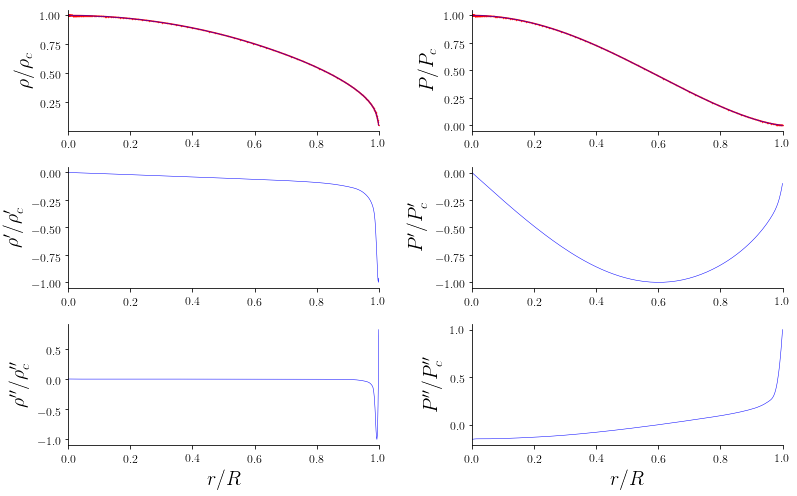

<Figure size 432x288 with 0 Axes>

In [39]:

fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(r1/(r1[-1]),rho1/abs(rho1[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r1/(r1[-1]),rhos1(r1)/abs(rho1[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(r1/(r1[-1]),p1/abs(p1[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r1/(r1[-1]),ps1(r1)/abs(p1[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(r1/(r1[-1]),drho1(r1)/max(abs(drho1(r1))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}/\rho^{\prime}_{c} $')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(r1/(r1[-1]),dp1(r1)/max(abs(dp1(r1))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime}/P^{\prime}_{c} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(r1/(r1[-1]),ddrho1(r1)/max(abs(ddrho1(r1))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}/\rho^{\prime\prime}_{c}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(r1/(r1[-1]),ddp1(r1)/max(abs(ddp1(r1))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime\prime}/P^{\prime\prime}_{c}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [40]:
m2,p2,rho2,nu2,r2 = static([m0,P_H4(rho02/rhodim),nu0],r0,dr0,rho_H4,cutoff=(1+0.17)*np.amin(rhoH4))

#np.savetxt('14.0.dat',np.c_[m2,p2,rho2,nu2,r2])

In [41]:
r2

array([0.00000000e+00, 1.00000000e-06, 1.05333333e-06, 1.10951111e-06,
       1.16868504e-06, 1.23101491e-06, 1.29666903e-06, 1.36582472e-06,
       1.43866870e-06, 1.51539770e-06, 1.59621891e-06, 1.68135058e-06,
       1.77102261e-06, 1.86547715e-06, 1.96496927e-06, 2.06976763e-06,
       2.18015524e-06, 2.29643018e-06, 2.41890646e-06, 2.54791480e-06,
       2.68380359e-06, 2.82693979e-06, 2.97770991e-06, 3.13652110e-06,
       3.30380223e-06, 3.48000501e-06, 3.66560528e-06, 3.86110423e-06,
       4.06702979e-06, 4.28393804e-06, 4.51241474e-06, 4.75307686e-06,
       5.00657429e-06, 5.27359159e-06, 5.55484980e-06, 5.85110846e-06,
       6.16316758e-06, 6.49186985e-06, 6.83810291e-06, 7.20280173e-06,
       7.58695115e-06, 7.99158855e-06, 8.41780660e-06, 8.86675629e-06,
       9.33964996e-06, 9.83776462e-06, 1.03624454e-05, 1.09151092e-05,
       1.14972483e-05, 1.21104349e-05, 1.27563247e-05, 1.34366621e-05,
       1.41532840e-05, 1.49081258e-05, 1.57032259e-05, 1.65407313e-05,
      

In [42]:
k1=5 #spline order kmax=5
s1=5e-7 #smooth factor
k2=5
s2=1e-10

rhos2=interpolate.UnivariateSpline(r2, rho2, k=k1, s=s1)
drho2=interpolate.UnivariateSpline(r2, rho2, k=k1, s=s1).derivative(n=1)
ddrho2=interpolate.UnivariateSpline(r2, rho2, k=k1, s=s1).derivative(n=2)

ps2=interpolate.UnivariateSpline(r2, p2, k=k2, s=s2)
dp2=interpolate.UnivariateSpline(r2, p2, k=k2, s=s2).derivative(n=1)
ddp2=interpolate.UnivariateSpline(r2, p2, k=k2, s=s2).derivative(n=2)

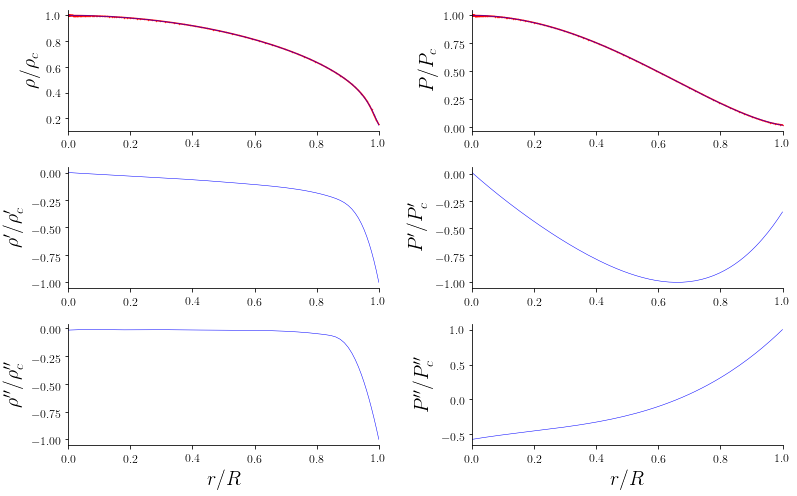

<Figure size 432x288 with 0 Axes>

In [43]:

fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(r2/(r2[-1]),rho2/abs(rho2[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r2/(r2[-1]),rhos2(r2)/abs(rho2[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(r2/(r2[-1]),p2/abs(p2[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r2/(r2[-1]),ps2(r2)/abs(p2[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(r2/(r2[-1]),drho2(r2)/max(abs(drho2(r2))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}/\rho^{\prime}_{c} $')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(r2/(r2[-1]),dp2(r2)/max(abs(dp2(r2))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime}/P^{\prime}_{c} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(r2/(r2[-1]),ddrho2(r2)/max(abs(ddrho2(r2))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}/\rho^{\prime\prime}_{c}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(r2/(r2[-1]),ddp2(r2)/max(abs(ddp2(r2))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime\prime}/P^{\prime\prime}_{c}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [44]:
m3,p3,rho3,nu3,r3 = static([m0,P_H4(rho03/rhodim),nu0],r0,dr0,rho_H4,cutoff=(1+0.11)*np.amin(rhoH4))

In [45]:
k1=5 #spline order kmax=5
s1=5e-6 #smooth factor
k2=5
s2=1e-15

rhos3=interpolate.UnivariateSpline(r3, rho3, k=k1, s=s1)
drho3=interpolate.UnivariateSpline(r3, rho3, k=k1, s=s1).derivative(n=1)
ddrho3=interpolate.UnivariateSpline(r3, rho3, k=k1, s=s1).derivative(n=2)

ps3=interpolate.UnivariateSpline(r3, p3, k=k1, s=s2)
dp3=interpolate.UnivariateSpline(r3, p3, k=k1, s=s2).derivative(n=1)
ddp3=interpolate.UnivariateSpline(r3, p3, k=k1, s=s2).derivative(n=2)

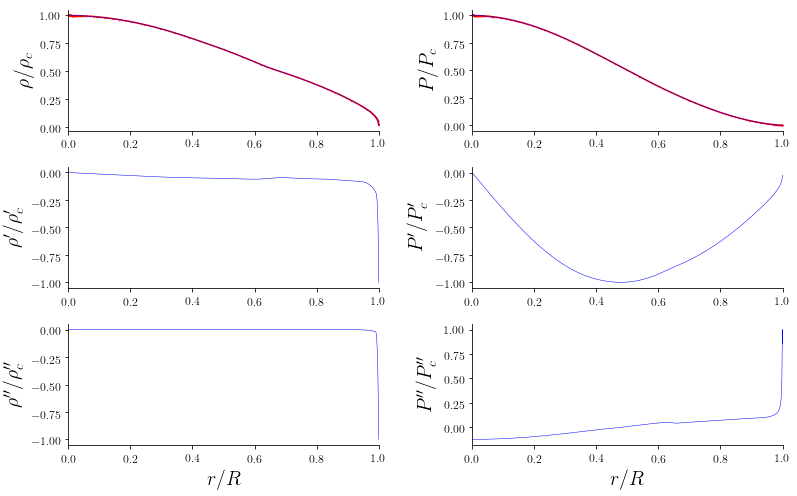

<Figure size 432x288 with 0 Axes>

In [46]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(r3/(r3[-1]),rho3/abs(rho3[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r3/(r3[-1]),rhos3(r3)/abs(rho3[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(r3/(r3[-1]),p3/abs(p3[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r3/(r3[-1]),ps3(r3)/abs(p3[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(r3/(r3[-1]),drho3(r3)/max(abs(drho3(r3))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}/\rho^{\prime}_{c} $')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(r3/(r3[-1]),dp3(r3)/max(abs(dp3(r3))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime}/P^{\prime}_{c} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(r3/(r3[-1]),ddrho3(r3)/max(abs(ddrho3(r3))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}/\rho^{\prime\prime}_{c}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(r3/(r3[-1]),ddp3(r3)/max(abs(ddp3(r3))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime\prime}/P^{\prime\prime}_{c}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

### Interpolating and finding derivatives

Using a spline with a smooth factor that fixes the number of knots for the fitting. The function UnivariateSpline (https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.interpolate.UnivariateSpline.html#scipy.interpolate.UnivariateSpline) allows one to find derivatives of the interpolation

In [47]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend',fontsize= 15,markerscale=1.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

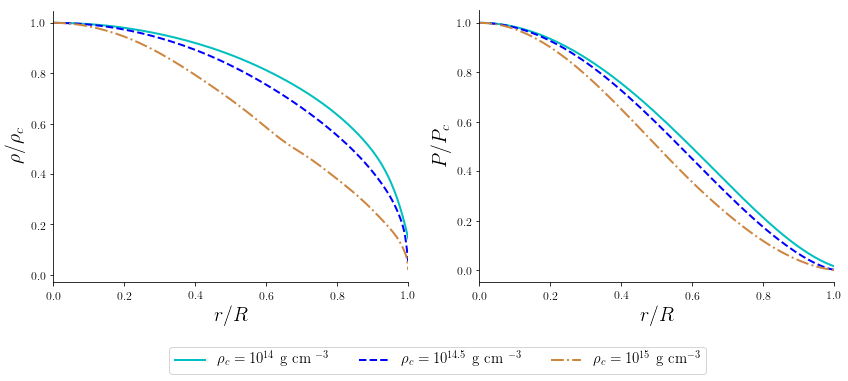

In [48]:
fig=plt.figure(figsize=[14,5])

plt.subplot(121)
#plt.plot(r2/(r2[-1]),rho2/abs(rho2[0]),color='olivedrab',marker='o',markersize='0.7') 
plt.plot(r2/(r2[-1]),rhos2(r2)/abs(rho2[0]),color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 
#plt.plot(r1/(r1[-1]),rho1/abs(rho1[0]),color='red',marker='o',markersize='0.7') 
plt.plot(r1/(r1[-1]),rhos1(r1)/abs(rho1[0]),color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 
#plt.plot(r3/(r3[-1]),rho3/abs(rho3[0]),color='darkslategray',marker='o',markersize='0.7') 
plt.plot(r3/(r3[-1]),rhos3(r3)/abs(rho3[0]),color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$') 

l = plt.legend(bbox_to_anchor=(0.78,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0)


plt.subplot(122)
plt.plot(r2/(r2[-1]),ps2(r2)/abs(p2[0]),color='c',linewidth='2.0')#,label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 
plt.plot(r1/(r1[-1]),ps1(r1)/abs(p1[0]),color='blue',linewidth='2.0',linestyle='--')#,label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 
plt.plot(r3/(r3[-1]),ps3(r3)/abs(p3[0]),color='peru',linewidth='2.0',linestyle='-.')#,label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$') 

plt.xlabel(r'$r/R$')
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)


fig.subplots_adjust(wspace=0.2)


plt.savefig('figures/PandRhoH4.pdf', format='pdf', dpi=1000,bbox_inches="tight")

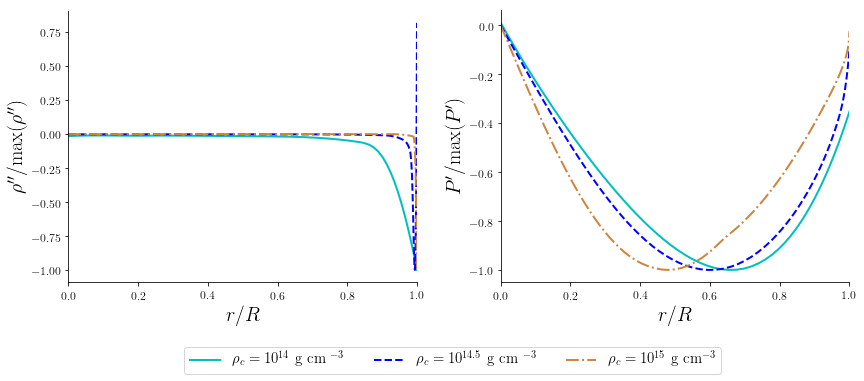

In [49]:
fig=plt.figure(figsize=[14,5])

plt.subplot(121)
#plt.plot(r2/(r2[-1]),rho2/abs(rho2[0]),color='olivedrab',marker='o',markersize='0.7') 
plt.plot(r2/(r2[-1]),ddrho2(r2)/max(abs(ddrho2(r2))),color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 
#plt.plot(r1/(r1[-1]),rho1/abs(rho1[0]),color='red',marker='o',markersize='0.7') 
plt.plot(r1/(r1[-1]),ddrho1(r1)/max(abs(ddrho1(r1))),color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 
#plt.plot(r3/(r3[-1]),rho3/abs(rho3[0]),color='darkslategray',marker='o',markersize='0.7') 
plt.plot(r3/(r3[-1]),ddrho3(r3)/max(abs(ddrho3(r3))),color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$') 

l = plt.legend(bbox_to_anchor=(0.78,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$\rho^{\prime \prime}/$max$(\rho^{\prime \prime})$')
plt.xlim(0,1.0)


plt.subplot(122)
plt.plot(r2/(r2[-1]),dp2(r2)/max(abs(dp2(r2))),color='c',linewidth='2.0')#,label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 
plt.plot(r1/(r1[-1]),dp1(r1)/max(abs(dp1(r1))),color='blue',linewidth='2.0',linestyle='--')#,label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 
plt.plot(r3/(r3[-1]),dp3(r3)/max(abs(dp3(r3))),color='peru',linewidth='2.0',linestyle='-.')#,label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$') 

plt.xlabel(r'$r/R$')
plt.ylabel(r'$P^{\prime}/$max$(P^{\prime})$')
plt.xlim(0,1.0)


fig.subplots_adjust(wspace=0.24)


plt.savefig('figures/StabilityH4.pdf', format='pdf', dpi=1000,bbox_inches="tight")

Plotting using the initial values to scale the solution

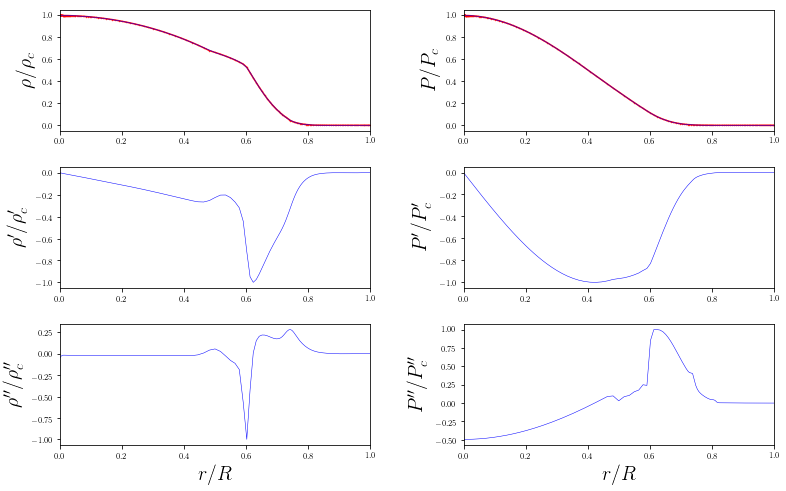

<Figure size 432x288 with 0 Axes>

In [36]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(r/(r[-1]),rho/abs(rho[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r/(r[-1]),rhos(r)/abs(rho[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(r/(r[-1]),p/abs(p[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r/(r[-1]),ps(r)/abs(p[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(r/(r[-1]),drho(r)/max(abs(drho(r))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}/\rho^{\prime}_{c} $')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(r/(r[-1]),dp(r)/max(abs(dp(r))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime}/P^{\prime}_{c} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(r/(r[-1]),ddrho(r)/max(abs(ddrho(r))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}/\rho^{\prime\prime}_{c}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(r/(r[-1]),ddp(r)/max(abs(ddp(r))),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime\prime}/P^{\prime\prime}_{c}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [233]:
dpdrho=np.divide(dp(r),drho(r))

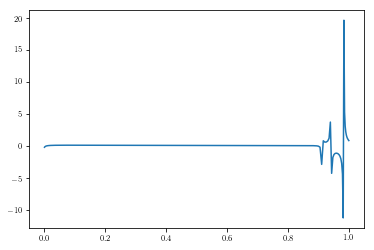

In [234]:
plt.plot(r/r[-1],dpdrho)

In [208]:
from scipy.interpolate import Rbf

In [161]:
rbf_interp = Rbf(r, rho, function='gaussian')
rbf_interp = Rbf(r, rho, function='gaussian').derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/scipy/interpolate/rbf.py:241: LinAlgWarning: Ill-conditioned matrix (rcond=9.33949e-20): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


AttributeError: 'Rbf' object has no attribute 'derivative'

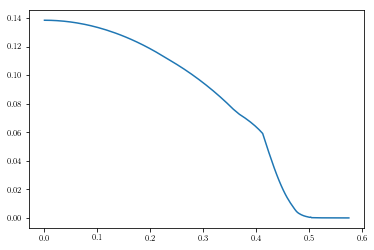

In [160]:
plt.plot(r,rbf_interp(r))

In [238]:
spl_preinterp=interpolate.splrep(r, rho, s=0)
spl_interp=interpolate.splev(r, spl_preinterp,der=0)
dspl_interp=interpolate.splev(r, spl_preinterp,der=1)

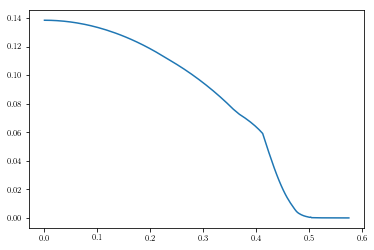

In [239]:
plt.plot(r,spl_interp)

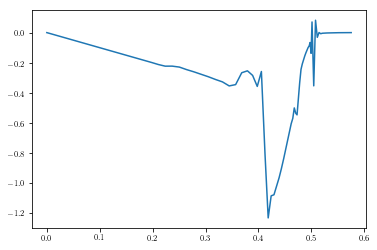

In [240]:
plt.plot(r,dspl_interp)

In [241]:
spl_preinterp1=interpolate.splrep(r, p, s=0)
spl_interp1=interpolate.splev(r, spl_preinterp1,der=0)
dspl_interp1=interpolate.splev(r, spl_preinterp1,der=1)

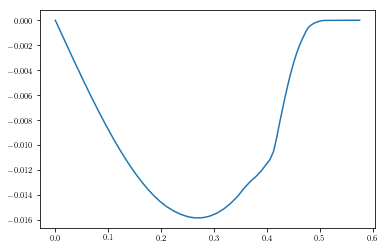

In [242]:
plt.plot(r,dspl_interp1)

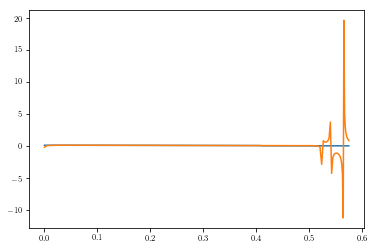

In [245]:
dpdrho1=np.divide(dspl_interp1,dspl_interp)
plt.plot(r,dpdrho1)
plt.plot(r,dpdrho)
plt.savefig('figures/speedsounds', format='pdf', dpi=1000,bbox_inches="tight")

In [256]:
import findiff

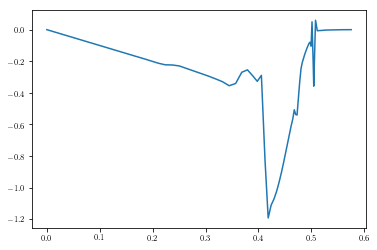

In [274]:
d_dx = findiff.FinDiff(0, r,acc=4)
drho22_dx = d_dx(rho)
plt.plot(r,drho22_dx)

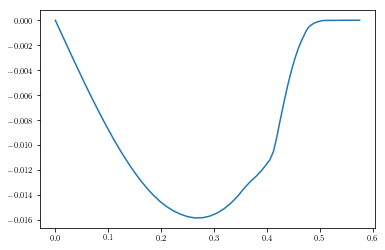

In [275]:
d_dx = findiff.FinDiff(0, r,acc=4)
dp22_dx = d_dx(p)
plt.plot(r,dp22_dx)

In [1]:
dpdrho2=np.divide(dp22_dx,drho22_dx)
plt.plot(r,np.sqrt(dpdrho2))

NameError: name 'np' is not defined

## $M-\rho_c$ and $M-R$ diagrams

The family of models are obtained choosing a range of central densities $rhosc$

In [7]:
def MRrhoc(m0,r0,dr0,rhosc,rhoEoS,PEoS,cutoff=0.0):
    """Builds a family of neutron star models from an equation of state P(rho) and rho(P), given a range of central densities rhosc.
    Returns three lists with the values of Rstar (RR) and Mstar (MM) for the corresponding value of rhoc (rhorho)."""
    psc=PEoS(rhosc/rhodim) #Range of central pressures
    MM=[];RR=[];rhorho=[]
    for pc in psc:
        m,p,rho,nu,r = static([m0,pc,0],r0,dr0,rhoEoS,cutoff)
        RR.append(r[-1]*rdim*1e-5); MM.append(m[-1]*mdim/Msun); rhorho.append(rho[0]*rhodim)
    return [RR,MM,rhorho]

In [67]:
#Range of central densities (It has to take into consideration how high the EOS's energy density goes)
n=np.arange((1/16)*(15*np.log10(np.amin(rhoGS1))+np.log10(np.amax(rhoGS1))),np.log10(np.amax(rhoGS1)),0.01)
rhosc=10.0**n 

In [78]:
#MRNL3=MRrhoc(m0,r0,dr0,rhosc,rho_NL3,P_NL3)
#MRALF1=MRrho(m_0,r0,dr0,rhosc,rho_ALF1,P_ALF1)
#MRSLy=MRrho(m_0,r0,dr0,rhosc,rho_SLy,P_SLy)
#MRH1=MRrho(m0,r0,dr0,rhosc,rho_H1,P_H1)
#MRBSK19=MRrho(m0,r0,dr0,rhosc,rho_BSK19,P_BSK19)
#MRBSK20=MRrho(m0,r0,dr0,rhosc,rho_BSK20,P_BSK20)
#MRSQM1=MRrhoc(m0,r0,dr0,rhosc,rho_SQM1,P_SQM1,(1+0.01)*np.amin(rhoSQM1))
#MRSQM2=MRrhoc(m0,r0,dr0,rhosc,rho_SQM2,P_SQM2,(1+0.01)*np.amin(rhoSQM2))
#MRSQM3=MRrhoc(m0,r0,dr0,rhosc,rho_SQM3,P_SQM3,(1+0.01)*np.amin(rhoSQM3))
#MRH5=MRrhoc(m0,r0,dr0,rhosc,rho_H5,P_H5,(1+0.05)*np.amin(rhoH5))


In [69]:
np.savetxt('MRrhocGS1.dat',np.c_[MRGS1[0],MRGS1[1],MRGS1[2]])

In [29]:
deltas = np.arange(0.1,0.8,0.1)
for deltaa in deltas:
    delta=deltaa
    MRALF1=MRrhoc(m0,r0,dr0,rhosc,rho_ALF1,P_ALF1,(1+0.1)*np.amin(rhoALF1))
    mmax=np.amax(MRALF1[1])
    print(mmax)

KeyboardInterrupt: 

Plotting $M-R$

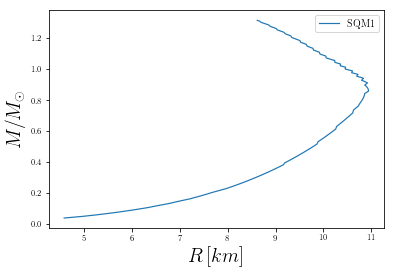

<Figure size 432x288 with 0 Axes>

In [79]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig = plt.figure()

#plt.plot(MRALF1[0], MRALF1[1],'-', linewidth=1.2,label='ALF1')
#plt.plot(MRSLy[0], MRSLy[1],'-', linewidth=1.2,label='SLy')
#plt.plot(MRNL3[0], MRNL3[1],'-', linewidth=1.2,label='NL3')
#plt.plot(MRH1[0], MRH1[1],'-', linewidth=1.2,label='H1')
#plt.plot(MRBSK19[0], MRBSK19[1],'-', linewidth=1.2,label='BSK19')
#plt.plot(MRBSK20[0], MRBSK20[1],'-', linewidth=1.2,label='BSK20')
plt.plot(MRGS1[0], MRGS1[1],'-', linewidth=1.2,label='SQM1')

plt.xlabel(r'$R\,[km]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend()
#plt.savefig('figures/MRrels.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

Plotting $M-\rho_c$

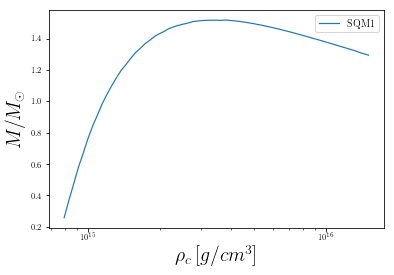

<Figure size 432x288 with 0 Axes>

In [79]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()

plt.plot(MRSQM1[2], MRSQM1[1], '-', linewidth=1.2,label='SQM1')
plt.xscale('log')
plt.xlabel(r'$\rho_c\,[g/cm^{3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend()
plt.savefig('figures/Mrhorel_NL3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()